# 二分类的Logistic回归

关键词：sigmoid、(2,1)的单层线性模型

#### 生成数据

In [19]:
# make data line: y = x
import random
x_0 = []
y_0 = []
while len(x_0) < 10:
    x = random.randint(100,999)
    y = random.randint(100,999)
    if x < y:
        x_0.append(x)
        y_0.append(y)

x_1 = []
y_1 = []
while len(x_1) < 10:
    x = random.randint(100,999)
    y = random.randint(100,999)
    if x > y:
        x_1.append(x)
        y_1.append(y)

In [21]:

x_0 = [i/10 for i in x_0]
y_0 = [i/10 for i in y_0]
x_1 = [i/10 for i in x_1]
y_1 = [i/10 for i in y_1]

print("x_0:{}\ny_0:{}\n\nx_1:{}\ny_1:{}".format(x_0,y_0,x_1,y_1))

x_0:[58.0, 29.0, 34.3, 66.1, 15.1, 51.1, 37.8, 57.5, 57.5, 17.6]
y_0:[90.7, 55.0, 65.7, 75.5, 57.3, 68.8, 93.9, 72.2, 91.6, 83.7]

x_1:[55.4, 98.2, 80.9, 54.2, 31.4, 71.3, 66.8, 71.4, 75.7, 64.0]
y_1:[46.5, 90.3, 39.3, 11.1, 10.7, 48.9, 49.8, 58.5, 48.2, 10.7]


In [99]:
x_0 = [34.6, 30.2, 35.8, 45.0, 95.8, 75.0, 39.5, 67.9]
y_0 = [78.0, 43.8, 72.9, 56.3, 38.2, 30.6, 76.0, 46.6]
x_1 = [60.1, 79.0, 61.1, 75.0, 76.0, 84.4, 82.3, 69.3, 53.9, 69.0]
y_1 = [86.3, 75.3, 96.5, 46.5, 87.4, 43.5, 76.4, 97.7, 89.2, 52.7]

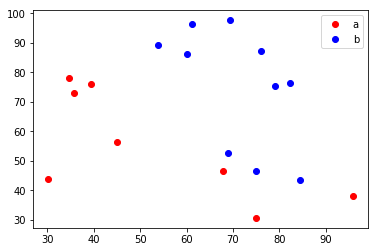

In [100]:
import matplotlib.pyplot as plt
plt.plot(x_0, y_0, 'ro', label = 'a')
plt.plot(x_1, y_1, 'bo', label = 'b')
plt.legend(loc='best')
plt.show()

#### 模型

In [101]:
from torch import nn
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.lr = nn.Linear(2,1)
        self.sm = nn.Sigmoid()
        
    def forward(self, x):
        x = self.lr(x)
        x = self.sm(x)
        return x

#### 数据处理

In [109]:
from torch import Tensor
# a
train_data = [[x_0[i], y_0[i] , 0] for i in range(len(x_0))]  
#b
train_data = train_data + [[x_1[i], y_1[i] ,1] for i in range(len(x_1))]
random.shuffle(train_data)
train_data

[[60.1, 86.3, 1],
 [35.8, 72.9, 0],
 [69.0, 52.7, 1],
 [84.4, 43.5, 1],
 [61.1, 96.5, 1],
 [34.6, 78.0, 0],
 [75.0, 30.6, 0],
 [79.0, 75.3, 1],
 [76.0, 87.4, 1],
 [69.3, 97.7, 1],
 [30.2, 43.8, 0],
 [45.0, 56.3, 0],
 [75.0, 46.5, 1],
 [95.8, 38.2, 0],
 [53.9, 89.2, 1],
 [39.5, 76.0, 0],
 [67.9, 46.6, 0],
 [82.3, 76.4, 1]]

In [110]:
train_input = [[i[0], i[1]] for i in train_data]
#train_input
train_output = [[i[2]] for i in train_data]
#train_output
train_input = Tensor(train_input)
train_output = Tensor(train_output)
train_input

tensor([[60.1000, 86.3000],
        [35.8000, 72.9000],
        [69.0000, 52.7000],
        [84.4000, 43.5000],
        [61.1000, 96.5000],
        [34.6000, 78.0000],
        [75.0000, 30.6000],
        [79.0000, 75.3000],
        [76.0000, 87.4000],
        [69.3000, 97.7000],
        [30.2000, 43.8000],
        [45.0000, 56.3000],
        [75.0000, 46.5000],
        [95.8000, 38.2000],
        [53.9000, 89.2000],
        [39.5000, 76.0000],
        [67.9000, 46.6000],
        [82.3000, 76.4000]])

#### 损失函数和优化函数

In [132]:
from torch import optim

model = LogisticRegression()
# nn.BCELoss 是二分类的损失函数
criterion = nn.BCELoss()
# 随机梯度下降优化函数，参数分别是：模型参数 学习率 动量
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9) 

#### 训练

In [133]:
from torch.autograd import Variable

In [134]:
num = 20000
for epoch in range(num):
   #forward
    '''
        输入数据的requires_grad = False(默认)，因为不需要对数据进行改变，要改什么才对其求导，比如权重矩阵
    '''
    inputs = Variable(train_input)
    label  = Variable(train_output)
    out = model(inputs)
    loss = criterion(out, label)
    
    mask = out.ge(0.5).float() 
    correct = (mask == label).sum() # sum()?
    acc = correct.item() / inputs.size(0) ## size(0)?
    
   #backward
    #原有梯度清零 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print('epoch {}/{}, loss: {:.4f}, acc: {:.4f}'.format(epoch+1,num,loss.item(),acc))

epoch 1000/20000, loss: 0.5809, acc: 0.6111
epoch 2000/20000, loss: 0.5506, acc: 0.6667
epoch 3000/20000, loss: 0.5246, acc: 0.7778
epoch 4000/20000, loss: 0.5024, acc: 0.8333
epoch 5000/20000, loss: 0.4831, acc: 0.8333
epoch 6000/20000, loss: 0.4663, acc: 0.9444
epoch 7000/20000, loss: 0.4516, acc: 0.9444
epoch 8000/20000, loss: 0.4387, acc: 0.9444
epoch 9000/20000, loss: 0.4272, acc: 0.9444
epoch 10000/20000, loss: 0.4169, acc: 0.9444
epoch 11000/20000, loss: 0.4077, acc: 0.9444
epoch 12000/20000, loss: 0.3994, acc: 0.9444
epoch 13000/20000, loss: 0.3918, acc: 0.9444
epoch 14000/20000, loss: 0.3850, acc: 0.9444
epoch 15000/20000, loss: 0.3788, acc: 0.9444
epoch 16000/20000, loss: 0.3730, acc: 0.9444
epoch 17000/20000, loss: 0.3678, acc: 0.9444
epoch 18000/20000, loss: 0.3630, acc: 0.9444
epoch 19000/20000, loss: 0.3585, acc: 0.9444
epoch 20000/20000, loss: 0.3543, acc: 0.9444


In [135]:
import numpy as np

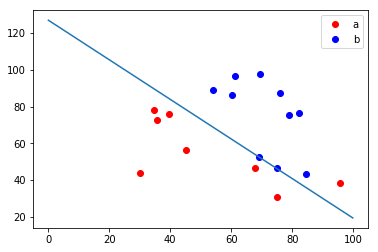

In [137]:
plt.plot(x_0, y_0, 'ro', label = 'a')
plt.plot(x_1, y_1, 'bo', label = 'b')
plt.legend(loc='best')

w0, w1 = model.lr.weight[0]
w0 = w0.item()
w1 = w1.item()
b = model.lr.bias.item()
plot_x = np.arange(0, 100, 0.1)
plot_y = (-w0 * plot_x - b) / w1
plt.plot(plot_x, plot_y)
plt.show()

#### 模型保存

In [141]:
from torch import save
save(model,'./model.all')
save(model.state_dict(),'./model.state')

c:\users\zd\appdata\local\programs\python\python36\lib\site-packages\torch\serialization.py:250: UserWarning: Couldn't retrieve source code for container of type LogisticRegression. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [142]:
print(model)

LogisticRegression(
  (lr): Linear(in_features=2, out_features=1, bias=True)
  (sm): Sigmoid()
)


In [143]:
model.state_dict()

OrderedDict([('lr.weight', tensor([[0.0640, 0.0595]])),
             ('lr.bias', tensor([-7.5468]))])